<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/05_Implementation_Optimization_Perspective_(Learning_Rate%2C_Activation_Function%2C_Epochs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 Implementation: Optimization Perspective (Learning Rate, Activation Function, Epochs)

## Step 1: Define the Perceptron’s Architecture



In this step, we will define the architecture of a perceptron which will be used to predict whether it will rain or not on a given day based on various input features. The perceptron is a simple linear binary classifier, and here we'll set up its initial configuration focusing on the key hyperparameters.



#### Objective
The objective is to predict the binary outcome: rain (1) or no rain (0), based on daily weather-related input features.



#### Key Components of Perceptron Architecture
1. **Inputs**: Choose relevant features that might influence the likelihood of rain. Common weather-related features include:
   - Temperature
   - Humidity
   - Pressure
   - Wind speed
   - Previous day's weather conditions

2. **Weights and Bias**: Each input feature has an associated weight, and there's an overall bias term. Initially, these can be set to small random values.

3. **Activation Function**: This will initially be a step function, turning a weighted sum of inputs into a binary output.

4. **Learning Rate**: Crucial for defining how much the weights should change in response to any error in prediction. A typical starting value might be 0.01 or 0.1.

5. **Number of Epochs**: This defines how many times the training data will be used to update the weights. A starting value might be 100 epochs.



#### Architecture Diagram:
Here is a simple representation of what a perceptron might look like for this task:

```
Input Layer       Weighted Sum       Activation       Output
[Feature 1] ---->                   ----> Step      ----> [Rain/No
[Feature 2] ----> [Sum = Σ(weights*inputs) + bias] ---->  Rain]
   ...         ---->
[Feature N] ---->
```



#### **Example: Predicting Rain**


Suppose we have historical weather data that includes daily measurements of temperature, humidity, pressure, wind speed, and whether it rained that day.



Step 1: Import libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



Step 2: Loading and Preprocessing dataset

In [45]:
# Load the real dataset (replace 'weather.csv' with your actual file path)
# This dataset should be in CSV format. Replace the file path with the correct one on your system.
df = pd.read_csv('weather.csv')

# Let's check the structure of the dataset to ensure the data is loaded correctly
print("First few rows of the dataset:")
print(df.head())

# Preprocessing: Convert categorical data to numerical
# We need to transform categorical features like 'Outlook', 'Wind', and 'Rain' into numerical values for the perceptron to process.
# 'Outlook' can be values like 'Sunny', 'Overcast', 'Rain'.
# 'Wind' can be values like 'Weak', 'Strong'.
# 'Rain' is the target variable ('Yes' or 'No'), which we are trying to predict.

label_encoder = LabelEncoder()


# Convert 'Outlook' to numeric
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])  # Converts categories like 'Sunny', 'Rain', 'Overcast' into 0, 1, 2, etc.

# Convert 'Wind' to numeric
df['Wind'] = label_encoder.fit_transform(df['Wind'])  # Converts 'Weak', 'Strong' into 0, 1

# Convert 'Temperature' to numeric
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])  # Converts 'Cool', 'Mild', 'Hot' into 0, 1, 2

# Convert 'Humidity' to numeric
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])  # Converts 'Normal', 'High' into 0, 1

# Convert 'Rain' (target variable) to numeric
df['Rain'] = label_encoder.fit_transform(df['Rain'])  # Converts 'Yes', 'No' into 1, 0


# Let's check the transformed dataset to verify that the categorical variables are now numeric
print("\nDataset after converting categorical variables to numeric:")
print(df.head())

# Define the learning rate and number of epochs (iterations of the training process)
learning_rate = 0.01  # Small learning rate ensures smooth weight updates
epochs = 100  # Number of passes through the dataset



First few rows of the dataset:
    Outlook Temperature Humidity    Wind Rain
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes

Dataset after converting categorical variables to numeric:
   Outlook  Temperature  Humidity  Wind  Rain
0        2            1         0     1     0
1        2            1         0     0     0
2        0            1         0     1     1
3        1            2         0     1     1
4        1            0         1     1     1


Step3: Defining Activation Function

In [46]:
# Step 3: Define the activation function (Step function for binary classification)
# This function will return 1 if the input is >= 0 and 0 otherwise (binary decision).
def step_function(x):
    return 1 if x >= 0 else 0



Step 4: Train the Perceptron


In [47]:
# Step 4: Train the Perceptron
def train_perceptron(features, labels, learning_rate, epochs):
    # Initialize the weights randomly for the features. The length of weights corresponds to the number of input features.
    weights = np.random.rand(features.shape[1])  # shape[1] gives the number of columns (features) in the dataset
    bias = np.random.rand(1)  # Bias is a single value

    # Train for a given number of epochs
    for epoch in range(epochs):
        total_error = 0  # Track total error for each epoch (to monitor learning progress)

        # Loop through each instance in the dataset
        for i in range(len(features)):
            inputs = features[i]  # Select the input features for the ith instance
            weighted_sum = np.dot(inputs, weights) + bias  # Compute the weighted sum (dot product of inputs and weights + bias)
            prediction = step_function(weighted_sum)  # Apply the step function to make a binary prediction (0 or 1)

            # Compute the error (difference between actual label and predicted value)
            error = labels[i] - prediction
            total_error += abs(error)  # Sum up the absolute error for this epoch

            # Update the weights and bias using the Perceptron learning rule
            # weight_new = weight_old + (learning_rate * error * input)
            weights += learning_rate * error * inputs  # Adjust weights proportional to the error
            bias += learning_rate * error  # Adjust the bias as well

        # Print epoch details every 10 epochs to track the progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Total Error: {total_error}")

    return weights, bias  # Return the final weights and bias after training



Step 5: Prediction function


In [48]:
# Step 5: Prediction function
def predict_perceptron(features, weights, bias):
    # Compute the weighted sum of inputs and weights, then apply the step function to get a binary prediction
    weighted_sum = np.dot(features, weights) + bias
    return step_function(weighted_sum)  # Return the predicted class (0 or 1)



Step 6: Evaluate model accuracy

In [49]:
# Step 6: Evaluate model accuracy
def evaluate_accuracy(features, labels, weights, bias):
    correct_predictions = 0  # Track the number of correct predictions
    # Loop through the test dataset and make predictions
    for i in range(len(features)):
        prediction = predict_perceptron(features[i], weights, bias)  # Make a prediction for the ith instance
        if prediction == labels[i]:  # If the prediction matches the actual label, increment correct predictions
            correct_predictions += 1
    # Compute accuracy as the percentage of correct predictions
    accuracy = correct_predictions / len(features)
    return accuracy



 Step 7: Split the dataset into training and testing sets

In [50]:

# Step 7: Split the dataset into training and testing sets
# We use train_test_split to randomly split the data (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract the features (input) and labels (output) from the training and test sets
# Drop the target variable 'Rain' to get the features
# We now include 'Temperature' and 'Humidity' along with other features
train_features = train_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
train_labels = train_df['Rain'].values  # The labels for training are 'Rain' (0 or 1)

# Do the same for the test set
test_features = test_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
test_labels = test_df['Rain'].values



Step 8: Train the perceptron with the training data

In [51]:

# Step 8: Train the perceptron with the training data
weights, bias = train_perceptron(train_features, train_labels, learning_rate, epochs)


Epoch 10, Total Error: 4
Epoch 20, Total Error: 3
Epoch 30, Total Error: 1
Epoch 40, Total Error: 2
Epoch 50, Total Error: 0
Epoch 60, Total Error: 0
Epoch 70, Total Error: 0
Epoch 80, Total Error: 0
Epoch 90, Total Error: 0
Epoch 100, Total Error: 0


Step 9: Evaluate the model's performance on the test set

In [52]:
# Step 9: Evaluate the model's performance on the test set
accuracy = evaluate_accuracy(test_features, test_labels, weights, bias)
print(f"\nTest Set Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy in percentage




Test Set Accuracy: 100.00%


Step 10: Test the model with an example input

In [53]:
# Step 10: Test the model with an example input
# You should modify this input based on your dataset's features
# The values must match the order and scale of your dataset (e.g., [Outlook, Temperature, Humidity, Wind])
example_input = np.array([2, 85, 85, 1])  # Example input for prediction

# Use the perceptron to make a prediction on the example input
prediction = predict_perceptron(example_input, weights, bias)
print(f"Prediction for input {example_input}: {'Rain' if prediction == 1 else 'No Rain'}")


Prediction for input [ 2 85 85  1]: Rain


## Step 2: Experiment with Different Learning Rates



Experimenting with Learning Rate: 0.001
Epoch 10, Total Error: 4
Epoch 20, Total Error: 4
Epoch 30, Total Error: 4
Epoch 40, Total Error: 4
Epoch 50, Total Error: 4
Epoch 60, Total Error: 4
Epoch 70, Total Error: 3
Epoch 80, Total Error: 3
Epoch 90, Total Error: 3
Epoch 100, Total Error: 3
Test Set Accuracy with Learning Rate 0.001: 33.33%

Experimenting with Learning Rate: 0.01
Epoch 10, Total Error: 4
Epoch 20, Total Error: 3
Epoch 30, Total Error: 3
Epoch 40, Total Error: 2
Epoch 50, Total Error: 3
Epoch 60, Total Error: 0
Epoch 70, Total Error: 0
Epoch 80, Total Error: 0
Epoch 90, Total Error: 0
Epoch 100, Total Error: 0
Test Set Accuracy with Learning Rate 0.01: 100.00%

Experimenting with Learning Rate: 0.05
Epoch 10, Total Error: 0
Epoch 20, Total Error: 0
Epoch 30, Total Error: 0
Epoch 40, Total Error: 0
Epoch 50, Total Error: 0
Epoch 60, Total Error: 0
Epoch 70, Total Error: 0
Epoch 80, Total Error: 0
Epoch 90, Total Error: 0
Epoch 100, Total Error: 0
Test Set Accuracy with L

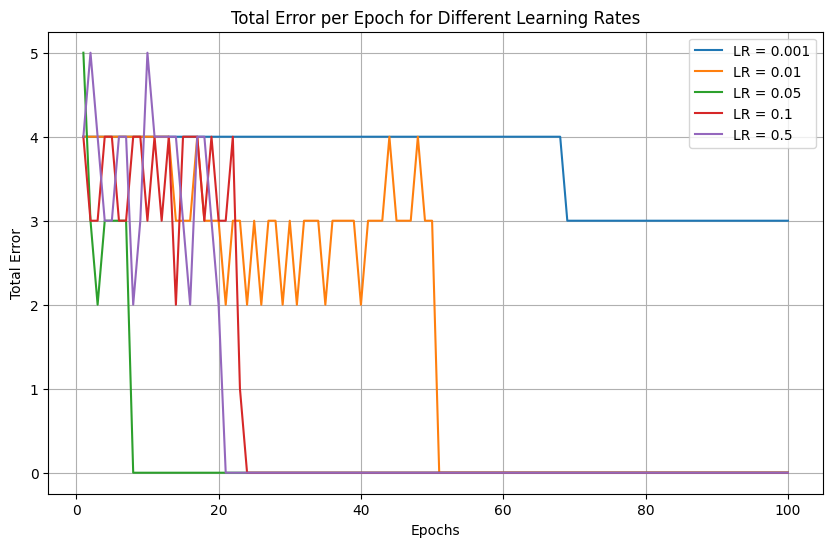

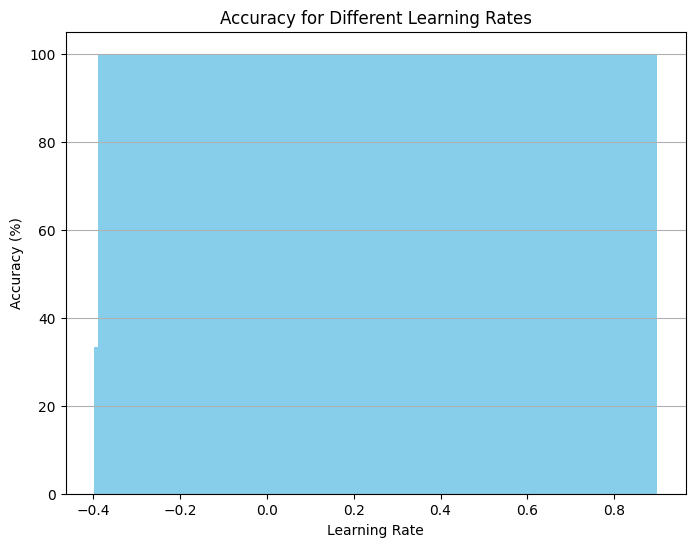

In [56]:
import matplotlib.pyplot as plt

# Step 4: Updated Train the Perceptron with Visualization Data Collection
def train_perceptron(features, labels, learning_rate, epochs):
    weights = np.random.rand(features.shape[1])  # Initialize random weights
    bias = np.random.rand(1)  # Initialize random bias
    errors_per_epoch = []  # To store the total error per epoch

    # Train the perceptron over the specified number of epochs
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(features)):
            inputs = features[i]
            weighted_sum = np.dot(inputs, weights) + bias
            prediction = step_function(weighted_sum)
            error = labels[i] - prediction
            total_error += abs(error)
            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error

        # Collect total error for each epoch
        errors_per_epoch.append(total_error)

        # Print error at every 10th epoch
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Total Error: {total_error}")

    return weights, bias, errors_per_epoch

# Step 8: Experiment with different learning rates and store errors per epoch for plotting
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
epochs = 100

# Dictionary to store errors per learning rate for visualization
errors_dict = {}
accuracies_dict = {}

for lr in learning_rates:
    print(f"\nExperimenting with Learning Rate: {lr}")

    # Train the perceptron with the current learning rate
    weights, bias, errors_per_epoch = train_perceptron(train_features, train_labels, lr, epochs)

    # Store the errors for visualization
    errors_dict[lr] = errors_per_epoch

    # Evaluate the model's performance on the test set
    accuracy = evaluate_accuracy(test_features, test_labels, weights, bias)
    accuracies_dict[lr] = accuracy
    print(f"Test Set Accuracy with Learning Rate {lr}: {accuracy * 100:.2f}%")

# Step 11: Plot the Total Error per Epoch for different learning rates
plt.figure(figsize=(10, 6))
for lr, errors in errors_dict.items():
    plt.plot(range(1, epochs + 1), errors, label=f'LR = {lr}')
plt.title('Total Error per Epoch for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)
plt.show()

# Step 12: Plot the Accuracy for Different Learning Rates
plt.figure(figsize=(8, 6))
learning_rates_list = list(accuracies_dict.keys())
accuracies_list = [accuracies_dict[lr] * 100 for lr in learning_rates_list]
plt.bar(learning_rates_list, accuracies_list, color='skyblue')
plt.title('Accuracy for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.grid(True, axis='y')
plt.show()


## Step 3: Experiment with Different Activation Functions


First few rows of the dataset:
    Outlook Temperature Humidity    Wind Rain
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes

Experimenting with Activation Function: step
Epoch 10, Total Error: 3 (Activation: step)
Epoch 20, Total Error: 0 (Activation: step)
Epoch 30, Total Error: 0 (Activation: step)
Epoch 40, Total Error: 0 (Activation: step)
Epoch 50, Total Error: 0 (Activation: step)
Epoch 60, Total Error: 0 (Activation: step)
Epoch 70, Total Error: 0 (Activation: step)
Epoch 80, Total Error: 0 (Activation: step)
Epoch 90, Total Error: 0 (Activation: step)
Epoch 100, Total Error: 0 (Activation: step)
Test Set Accuracy with Activation Function step: 66.67%

Experimenting with Activation Function: sigmoid
Epoch 10, Total Error: 3 (Activation: sigmoid)
Epoch 20, Total Error: 0 (Activation: sigmoid)
Epoch 3

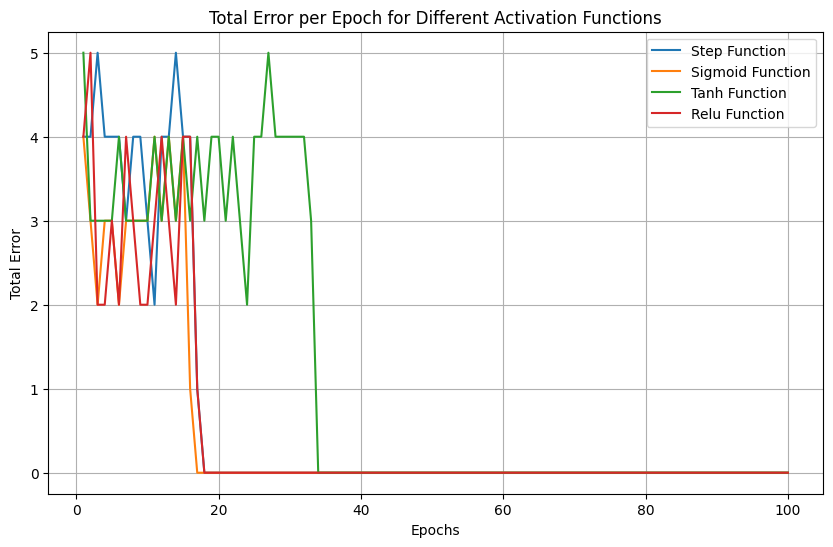

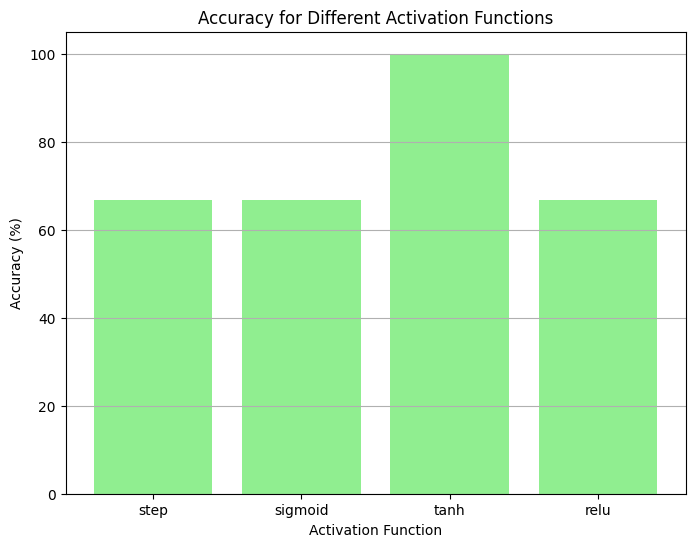

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the real dataset (replace 'weather.csv' with your actual file path)
df = pd.read_csv('weather.csv')

# Let's check the structure of the dataset to ensure the data is loaded correctly
print("First few rows of the dataset:")
print(df.head())

# Step 2: Preprocessing - Convert categorical data to numerical
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Rain'] = label_encoder.fit_transform(df['Rain'])

# Step 3: Define different activation functions
def step_function(x):
    return 1 if x >= 0 else 0

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return max(0, x)

# Step 4: Train the Perceptron with a chosen activation function
def train_perceptron(features, labels, learning_rate, epochs, activation_function):
    weights = np.random.rand(features.shape[1])  # Initialize random weights
    bias = np.random.rand(1)  # Initialize random bias
    errors_per_epoch = []  # To store the total error per epoch

    # Train the perceptron over the specified number of epochs
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(features)):
            inputs = features[i]
            weighted_sum = np.dot(inputs, weights) + bias
            # Apply the chosen activation function
            if activation_function == 'step':
                prediction = step_function(weighted_sum)
            elif activation_function == 'sigmoid':
                prediction = 1 if sigmoid_function(weighted_sum) >= 0.5 else 0
            elif activation_function == 'tanh':
                prediction = 1 if tanh_function(weighted_sum) >= 0 else 0
            elif activation_function == 'relu':
                prediction = 1 if relu_function(weighted_sum) >= 0.5 else 0

            error = labels[i] - prediction
            total_error += abs(error)
            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error

        # Collect total error for each epoch
        errors_per_epoch.append(total_error)

        # Print error at every 10th epoch
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Total Error: {total_error} (Activation: {activation_function})")

    return weights, bias, errors_per_epoch

# Step 5: Prediction function
def predict_perceptron(features, weights, bias, activation_function):
    weighted_sum = np.dot(features, weights) + bias
    if activation_function == 'step':
        return step_function(weighted_sum)
    elif activation_function == 'sigmoid':
        return 1 if sigmoid_function(weighted_sum) >= 0.5 else 0
    elif activation_function == 'tanh':
        return 1 if tanh_function(weighted_sum) >= 0 else 0
    elif activation_function == 'relu':
        return 1 if relu_function(weighted_sum) >= 0.5 else 0

# Step 6: Evaluate model accuracy
def evaluate_accuracy(features, labels, weights, bias, activation_function):
    correct_predictions = 0
    for i in range(len(features)):
        prediction = predict_perceptron(features[i], weights, bias, activation_function)
        if prediction == labels[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(features)
    return accuracy

# Step 7: Split the dataset into training and testing sets (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract features and labels for training and testing sets
train_features = train_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
train_labels = train_df['Rain'].values
test_features = test_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
test_labels = test_df['Rain'].values

# Step 8: Experiment with different activation functions and learning rates
activation_functions = ['step', 'sigmoid', 'tanh', 'relu']
learning_rate = 0.1  # Fixed learning rate
epochs = 100  # Number of epochs

# Dictionary to store errors and accuracies for each activation function
errors_dict = {}
accuracies_dict = {}

for activation in activation_functions:
    print(f"\nExperimenting with Activation Function: {activation}")

    # Train the perceptron with the current activation function
    weights, bias, errors_per_epoch = train_perceptron(train_features, train_labels, learning_rate, epochs, activation)

    # Store the errors for visualization
    errors_dict[activation] = errors_per_epoch

    # Evaluate the model's performance on the test set
    accuracy = evaluate_accuracy(test_features, test_labels, weights, bias, activation)
    accuracies_dict[activation] = accuracy
    print(f"Test Set Accuracy with Activation Function {activation}: {accuracy * 100:.2f}%")

# Step 9: Plot the Total Error per Epoch for different activation functions
plt.figure(figsize=(10, 6))
for activation, errors in errors_dict.items():
    plt.plot(range(1, epochs + 1), errors, label=f'{activation.capitalize()} Function')
plt.title('Total Error per Epoch for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Plot the Accuracy for Different Activation Functions
plt.figure(figsize=(8, 6))
activations_list = list(accuracies_dict.keys())
accuracies_list = [accuracies_dict[activation] * 100 for activation in activations_list]
plt.bar(activations_list, accuracies_list, color='lightgreen')
plt.title('Accuracy for Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy (%)')
plt.grid(True, axis='y')
plt.show()


## Step 4: Use Different Numbers of Epochs

---




First few rows of the dataset:
    Outlook Temperature Humidity    Wind Rain
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes
Epoch 10, Total Error: 4, Accuracy: 66.67%
Epoch 20, Total Error: 2, Accuracy: 33.33%
Epoch 30, Total Error: 2, Accuracy: 66.67%
Epoch 40, Total Error: 2, Accuracy: 66.67%
Epoch 50, Total Error: 2, Accuracy: 66.67%
Epoch 60, Total Error: 2, Accuracy: 66.67%
Epoch 70, Total Error: 2, Accuracy: 100.00%
Epoch 80, Total Error: 3, Accuracy: 100.00%
Epoch 90, Total Error: 3, Accuracy: 100.00%
Epoch 100, Total Error: 3, Accuracy: 100.00%


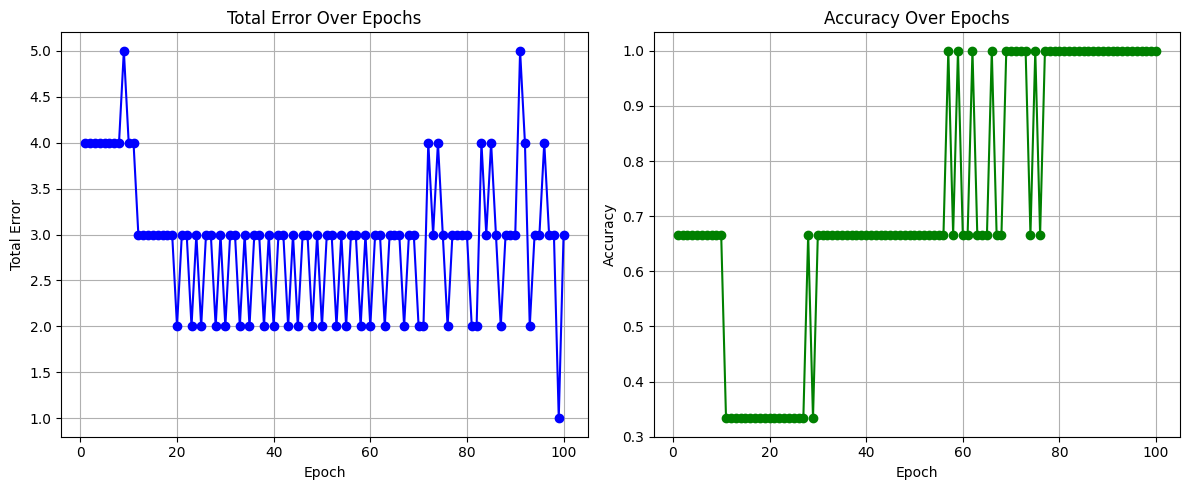

Prediction for input [ 2 85 85  1]: Rain


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset and preprocess it
df = pd.read_csv('weather.csv')

# Let's check the structure of the dataset to ensure the data is loaded correctly
print("First few rows of the dataset:")
print(df.head())

# Preprocessing: Convert categorical data to numerical
label_encoder = LabelEncoder()

# Convert 'Outlook' to numeric
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])  # Converts categories like 'Sunny', 'Rain', 'Overcast' into 0, 1, 2, etc.

# Convert 'Wind' to numeric
df['Wind'] = label_encoder.fit_transform(df['Wind'])  # Converts 'Weak', 'Strong' into 0, 1

# Convert 'Temperature' to numeric
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])  # Converts 'Cool', 'Mild', 'Hot' into 0, 1, 2

# Convert 'Humidity' to numeric
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])  # Converts 'Normal', 'High' into 0, 1

# Convert 'Rain' (target variable) to numeric
df['Rain'] = label_encoder.fit_transform(df['Rain'])  # Converts 'Yes', 'No' into 1, 0

# Step 2: Define the activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Step 3: Train the Perceptron and track total error and accuracy
def train_perceptron(features, labels, learning_rate, epochs, test_features, test_labels):
    weights = np.random.rand(features.shape[1])  # Randomly initialize weights
    bias = np.random.rand(1)  # Randomly initialize bias

    total_errors = []  # Track total error for each epoch
    accuracies = []  # Track accuracy for each epoch

    for epoch in range(epochs):
        total_error = 0  # Track total error for each epoch
        for i in range(len(features)):
            inputs = features[i]
            weighted_sum = np.dot(inputs, weights) + bias
            prediction = step_function(weighted_sum)
            error = labels[i] - prediction
            total_error += abs(error)

            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error

        # Append total error for this epoch
        total_errors.append(total_error)

        # Compute accuracy for the current epoch
        accuracy = evaluate_accuracy(test_features, test_labels, weights, bias)
        accuracies.append(accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Total Error: {total_error}, Accuracy: {accuracy * 100:.2f}%")

    return weights, bias, total_errors, accuracies

# Step 4: Prediction function
def predict_perceptron(features, weights, bias):
    weighted_sum = np.dot(features, weights) + bias
    return step_function(weighted_sum)

# Step 5: Evaluate model accuracy
def evaluate_accuracy(features, labels, weights, bias):
    correct_predictions = 0
    for i in range(len(features)):
        prediction = predict_perceptron(features[i], weights, bias)
        if prediction == labels[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(features)
    return accuracy

# Step 6: Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract the features and labels for training and testing
train_features = train_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
train_labels = train_df['Rain'].values
test_features = test_df[['Outlook', 'Temperature', 'Humidity', 'Wind']].values
test_labels = test_df['Rain'].values

# Step 7: Train the perceptron and visualize the results
learning_rate = 0.01
epochs = 100

# Train the perceptron and get total errors and accuracies for each epoch
weights, bias, total_errors, accuracies = train_perceptron(train_features, train_labels, learning_rate, epochs, test_features, test_labels)

# Step 8: Visualize Total Error over Epochs
plt.figure(figsize=(12, 5))

# Plot 1: Total Error
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), total_errors, color='blue', marker='o')
plt.title('Total Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.grid(True)

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, color='green', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# Step 9: Test the model with an example input
example_input = np.array([2, 85, 85, 1])  # Example input
prediction = predict_perceptron(example_input, weights, bias)
print(f"Prediction for input {example_input}: {'Rain' if prediction == 1 else 'No Rain'}")


## Observations: